In [54]:
#  Objective: To predict if the price of a house in the city of nashville is over or under the regular price.
#  Dataset: Dataset consits of 26 variables
#  Data Description: it is a dataset that has 26 columns distributed in 22651 rows  
#  They are as follows:
#        'Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
#        'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
#        'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
#        'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
#        'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
#        'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
#        'Sale Price Compared To Value'
#  Each variable is self explanatory. 
#  some variables are dropped depending on their necessity in building the model.
#  Algorithm: 
#  In this notebook we are using 4 different algorithms like linear regression, Decision Tree supervised learning algorithm, random forest, gradient boosting to predict 'Sale Price Compared To Value' 
# 


In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import datetime

In [2]:
#reading the dataset

df = pd.read_csv('week 4 - Nashville_housing_data.csv')
df.head()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/2013,20130118-0006337,No,No,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/2013,20130124-0008033,No,No,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/2013,20130128-0008863,No,No,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/2013,20130131-0009929,No,No,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,1/4/2013,20130118-0006110,No,No,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


In [3]:
df.shape

(22651, 26)

In [4]:
list(df.columns)

['Unnamed: 0',
 'Parcel ID',
 'Land Use',
 'Property Address',
 'Suite/ Condo   #',
 'Property City',
 'Sale Date',
 'Legal Reference',
 'Sold As Vacant',
 'Multiple Parcels Involved in Sale',
 'City',
 'State',
 'Acreage',
 'Tax District',
 'Neighborhood',
 'Land Value',
 'Building Value',
 'Finished Area',
 'Foundation Type',
 'Year Built',
 'Exterior Wall',
 'Grade',
 'Bedrooms',
 'Full Bath',
 'Half Bath',
 'Sale Price Compared To Value']

In [6]:
df.describe()

,Unnamed: 0,Suite/ Condo #,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,22651.000000,0.0,22651.000000,22651.000000,2.265100e+04,2.265100e+04,22650.000000,22651.000000,22648.000000,22650.000000,22543.000000
mean,27889.491192,NaN,0.454705,4432.715024,7.013797e+04,1.722402e+05,1915.377151,1961.947684,3.104910,1.887285,0.270239
std,16598.865706,NaN,0.611818,2142.803595,1.029035e+05,1.896424e+05,1079.094521,25.843908,0.829287,0.951220,0.480186
min,1.000000,NaN,0.040000,107.000000,9.000000e+02,1.400000e+03,450.000000,1832.000000,0.000000,0.000000,0.000000
25%,13324.500000,NaN,0.200000,3130.000000,2.200000e+04,8.550000e+04,1250.000000,1947.000000,3.000000,1.000000,0.000000
50%,27712.000000,NaN,0.280000,4026.000000,3.000000e+04,1.188000e+05,1645.824995,1959.000000,3.000000,2.000000,0.000000
75%,42330.500000,NaN,0.460000,6229.000000,6.030000e+04,1.882500e+05,2213.375000,1977.000000,4.000000,2.000000,1.000000
max,56615.000000,NaN,17.500000,9530.000000,1.869000e+06,5.824300e+06,19728.249880,2017.000000,11.000000,10.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [8]:
#to know the correlation between the variables
df.corr()

,Unnamed: 0,Suite/ Condo #,Acreage,Neighborhood,Land Value,Building Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
Unnamed: 0,1.000000,NaN,0.001645,0.017205,-0.054738,-0.055617,-0.050199,0.022202,-0.030719,-0.045418,-0.016831
Suite/ Condo #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acreage,0.001645,NaN,1.000000,0.320738,0.409704,0.271412,0.400578,0.053776,0.203160,0.287875,0.080697
Neighborhood,0.017205,NaN,0.320738,1.000000,0.190455,0.077245,0.187834,0.140722,0.107892,0.142079,0.014959
Land Value,-0.054738,NaN,0.409704,0.190455,1.000000,0.610773,0.658243,-0.010623,0.345507,0.542006,0.191678
Building Value,-0.055617,NaN,0.271412,0.077245,0.610773,1.000000,0.844615,0.207384,0.449249,0.648621,0.384778
Finished Area,-0.050199,NaN,0.400578,0.187834,0.658243,0.844615,1.000000,0.224519,0.609500,0.771553,0.367647
Year Built,0.022202,NaN,0.053776,0.140722,-0.010623,0.207384,0.224519,1.000000,0.193241,0.296137,0.238678
Bedrooms,-0.030719,NaN,0.203160,0.107892,0.345507,0.449249,0.609500,0.193241,1.000000,0.609147,0.213062
Full Bath,-0.045418,NaN,0.287875,0.142079,0.542006,0.648621,0.771553,0.296137,0.609147,1.000000,0.092340


In [9]:
df.shape

(22651, 26)

In [10]:
df.columns

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
       'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')

In [11]:
df.isna().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [12]:
df.columns.unique()

Index(['Unnamed: 0', 'Parcel ID', 'Land Use', 'Property Address',
       'Suite/ Condo   #', 'Property City', 'Sale Date', 'Legal Reference',
       'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'State',
       'Acreage', 'Tax District', 'Neighborhood', 'Land Value',
       'Building Value', 'Finished Area', 'Foundation Type', 'Year Built',
       'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath',
       'Sale Price Compared To Value'],
      dtype='object')

In [13]:
#dropping the variables that are not so useful in the model

df = df.drop(labels = ['Suite/ Condo   #','Parcel ID','Unnamed: 0','Property Address','Legal Reference','Multiple Parcels Involved in Sale','Tax District','Neighborhood','Grade'],axis = 1)

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

Land Use                        0
Property City                   0
Sale Date                       0
Sold As Vacant                  0
City                            0
State                           0
Acreage                         0
Land Value                      0
Building Value                  0
Finished Area                   0
Foundation Type                 0
Year Built                      0
Exterior Wall                   0
Bedrooms                        0
Full Bath                       0
Half Bath                       0
Sale Price Compared To Value    0
dtype: int64

In [16]:
df['State'].unique()

array(['TN'], dtype=object)

In [17]:
df = df.drop(labels = ['State','City'] , axis = 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22536 entries, 0 to 22650
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Land Use                      22536 non-null  object 
 1   Property City                 22536 non-null  object 
 2   Sale Date                     22536 non-null  object 
 3   Sold As Vacant                22536 non-null  object 
 4   Acreage                       22536 non-null  float64
 5   Land Value                    22536 non-null  int64  
 6   Building Value                22536 non-null  int64  
 7   Finished Area                 22536 non-null  float64
 8   Foundation Type               22536 non-null  object 
 9   Year Built                    22536 non-null  int64  
 10  Exterior Wall                 22536 non-null  object 
 11  Bedrooms                      22536 non-null  float64
 12  Full Bath                     22536 non-null  float64
 13  H

In [19]:
df.head()

,Land Use,Property City,Sale Date,Sold As Vacant,Acreage,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,NASHVILLE,1/11/2013,No,0.17,32000,134400,1149.00000,PT BSMT,1941,BRICK,2.0,1.0,0.0,Over
1,SINGLE FAMILY,NASHVILLE,1/18/2013,No,0.11,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,3.0,2.0,1.0,Over
2,SINGLE FAMILY,NASHVILLE,1/18/2013,No,0.17,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,4.0,2.0,0.0,Under
3,SINGLE FAMILY,NASHVILLE,1/23/2013,No,0.34,25000,138100,1969.00000,CRAWL,1910,FRAME,2.0,1.0,0.0,Under
4,SINGLE FAMILY,NASHVILLE,1/4/2013,No,0.17,25000,86100,1037.00000,CRAWL,1945,FRAME,2.0,1.0,0.0,Under


In [20]:
# df['Sale Date'] = df['Sale Date'][4:8]

In [21]:
df.head()

,Land Use,Property City,Sale Date,Sold As Vacant,Acreage,Land Value,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,SINGLE FAMILY,NASHVILLE,1/11/2013,No,0.17,32000,134400,1149.00000,PT BSMT,1941,BRICK,2.0,1.0,0.0,Over
1,SINGLE FAMILY,NASHVILLE,1/18/2013,No,0.11,34000,157800,2090.82495,SLAB,2000,BRICK/FRAME,3.0,2.0,1.0,Over
2,SINGLE FAMILY,NASHVILLE,1/18/2013,No,0.17,25000,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,4.0,2.0,0.0,Under
3,SINGLE FAMILY,NASHVILLE,1/23/2013,No,0.34,25000,138100,1969.00000,CRAWL,1910,FRAME,2.0,1.0,0.0,Under
4,SINGLE FAMILY,NASHVILLE,1/4/2013,No,0.17,25000,86100,1037.00000,CRAWL,1945,FRAME,2.0,1.0,0.0,Under


In [22]:
#converting the datatype to datetime

df['Sale Date']=pd.to_datetime(df['Sale Date'])
df['sale year'] = pd.DatetimeIndex(df['Sale Date']).year


In [23]:
#creating two new columns 'age' and 'total value' ,while dropping the old columns to save memory and processing time

df['age'] = df['sale year'] - df['Year Built']
df['Total Value'] = df['Building Value'] + df['Land Value']
df = df.drop(labels = ['sale year','Land Value','Building Value','Sale Date'],axis = 1)
df.head()

,Land Use,Property City,Sold As Vacant,Acreage,Finished Area,Foundation Type,Year Built,Exterior Wall,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value,age,Total Value
0,SINGLE FAMILY,NASHVILLE,No,0.17,1149.00000,PT BSMT,1941,BRICK,2.0,1.0,0.0,Over,72,166400
1,SINGLE FAMILY,NASHVILLE,No,0.11,2090.82495,SLAB,2000,BRICK/FRAME,3.0,2.0,1.0,Over,13,191800
2,SINGLE FAMILY,NASHVILLE,No,0.17,2145.60001,FULL BSMT,1948,BRICK/FRAME,4.0,2.0,0.0,Under,65,268700
3,SINGLE FAMILY,NASHVILLE,No,0.34,1969.00000,CRAWL,1910,FRAME,2.0,1.0,0.0,Under,103,163100
4,SINGLE FAMILY,NASHVILLE,No,0.17,1037.00000,CRAWL,1945,FRAME,2.0,1.0,0.0,Under,68,111100


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22536 entries, 0 to 22650
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Land Use                      22536 non-null  object 
 1   Property City                 22536 non-null  object 
 2   Sold As Vacant                22536 non-null  object 
 3   Acreage                       22536 non-null  float64
 4   Finished Area                 22536 non-null  float64
 5   Foundation Type               22536 non-null  object 
 6   Year Built                    22536 non-null  int64  
 7   Exterior Wall                 22536 non-null  object 
 8   Bedrooms                      22536 non-null  float64
 9   Full Bath                     22536 non-null  float64
 10  Half Bath                     22536 non-null  float64
 11  Sale Price Compared To Value  22536 non-null  object 
 12  age                           22536 non-null  int64  
 13  T

In [25]:
# using label encoder to convert the datatype from 'object' to 'numeric' , for certain categorical variables
 
le = LabelEncoder()

df['Land Use'] = le.fit_transform(df['Land Use'])
df['Property City'] = le.fit_transform(df['Property City'])
df['Sold As Vacant'] = le.fit_transform(df['Sold As Vacant'])
df['Foundation Type'] = le.fit_transform(df['Foundation Type'])
df['Exterior Wall'] = le.fit_transform(df['Exterior Wall'])
df['Sale Price Compared To Value'] = le.fit_transform(df['Sale Price Compared To Value'])



In [26]:
# converting the datatype from 'numeric' to 'category' to let the variable remain categorical


df['Land Use'] = df['Land Use'].astype('category')
df['Property City'] = df['Property City'].astype('category')
df['Sold As Vacant'] = df['Sold As Vacant'].astype('category')
df['Foundation Type'] = df['Foundation Type'].astype('category')
df['Exterior Wall'] = df['Exterior Wall'].astype('category')
df['Sale Price Compared To Value'] = df['Sale Price Compared To Value'].astype('category')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22536 entries, 0 to 22650
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Land Use                      22536 non-null  category
 1   Property City                 22536 non-null  category
 2   Sold As Vacant                22536 non-null  category
 3   Acreage                       22536 non-null  float64 
 4   Finished Area                 22536 non-null  float64 
 5   Foundation Type               22536 non-null  category
 6   Year Built                    22536 non-null  int64   
 7   Exterior Wall                 22536 non-null  category
 8   Bedrooms                      22536 non-null  float64 
 9   Full Bath                     22536 non-null  float64 
 10  Half Bath                     22536 non-null  float64 
 11  Sale Price Compared To Value  22536 non-null  category
 12  age                           22536 non-null  

In [28]:
x = df.drop(labels = ['Sale Price Compared To Value'] , axis = 1)
y = df['Sale Price Compared To Value']

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

# trying linear regression

In [30]:
# target variable needs classification model,but tried to test how the regression model work on this data set

lr = LinearRegression()
lr_fit = lr.fit(x_train,y_train)

In [31]:
y_pred = lr_fit.predict(x_test)

In [32]:
mean_squared_error(y_pred,y_test)

0.1673885212408384

In [33]:
mean_absolute_error(y_pred,y_test)

0.33112201166831556

In [34]:
# this indicate the regression model is useless for this data as desired r2 score is 0.8 and above,which we got a complete undesired score

r2_score(y_pred,y_test)

-7.585799726984163

# implementing decision tree

In [35]:
# implementing the decision tree model for the same dataset , where the criterion is 'entropy',entropy criterion lets the values of probability to remain in (0,1)

dec_model= DecisionTreeClassifier(random_state=10, 
                                  criterion="entropy", 
                                  max_depth=10)

In [36]:
dec_model_fit = dec_model.fit(x_train, y_train) ## Train the model

In [37]:
dec_model_fit

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=10)

In [38]:
predicted = dec_model_fit.predict(x_test)

In [39]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      5067
           1       0.64      0.14      0.23      1694

    accuracy                           0.76      6761
   macro avg       0.70      0.56      0.55      6761
weighted avg       0.74      0.76      0.70      6761



In [40]:
print(confusion_matrix(y_test, predicted))

[[4931  136]
 [1456  238]]


In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7645318739831386


In [42]:
##Extracting tree rules
from sklearn.tree import export_text
tree_rules = export_text(dec_model, 
                         feature_names=list(x_train.columns))

In [43]:
print(tree_rules)

|--- age <= -0.50
|   |--- Exterior Wall <= 5.00
|   |   |--- Finished Area <= 8406.50
|   |   |   |--- Acreage <= 0.09
|   |   |   |   |--- age <= -1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  -1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Acreage >  0.09
|   |   |   |   |--- Total Value <= 444650.00
|   |   |   |   |   |--- Total Value <= 438750.00
|   |   |   |   |   |   |--- Year Built <= 2014.50
|   |   |   |   |   |   |   |--- Half Bath <= 1.50
|   |   |   |   |   |   |   |   |--- Foundation Type <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Foundation Type >  3.50
|   |   |   |   |   |   |   |   |   |--- Total Value <= 247000.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Total Value >  247000.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Half Bath >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   

accuracy through decision tree algorithm with 'entropy' criterion is 76.5 , which seems better than the linear regression model

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      5067
           1       0.73      0.11      0.20      1694

    accuracy                           0.77      6761
   macro avg       0.75      0.55      0.53      6761
weighted avg       0.76      0.77      0.70      6761

Accuracy: 0.767046294926786


[Text(0.417529296875, 0.95, 'age <= -0.5\nsamples = 15775\nvalue = [11912, 3863]\nclass = yes'),
 Text(0.0515625, 0.85, 'Exterior Wall <= 5.0\nsamples = 289\nvalue = [7, 282]\nclass = No'),
 Text(0.0390625, 0.75, 'Finished Area <= 8406.5\nsamples = 284\nvalue = [5, 279]\nclass = No'),
 Text(0.0328125, 0.65, 'Acreage <= 0.085\nsamples = 283\nvalue = [4, 279]\nclass = No'),
 Text(0.0125, 0.55, 'Finished Area <= 1768.0\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(0.00625, 0.45, 'samples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.01875, 0.45, 'samples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.053125, 0.55, 'Foundation Type <= 3.5\nsamples = 281\nvalue = [3, 278]\nclass = No'),
 Text(0.03125, 0.45, 'Half Bath <= 1.5\nsamples = 273\nvalue = [2, 271]\nclass = No'),
 Text(0.01875, 0.35, 'Foundation Type <= 0.5\nsamples = 246\nvalue = [1, 245]\nclass = No'),
 Text(0.0125, 0.25, 'samples = 213\nvalue = [0, 213]\nclass = No'),
 Text(0.025, 0.25, 'Bedrooms <= 3.5\nsamples = 33\nvalue = [1,

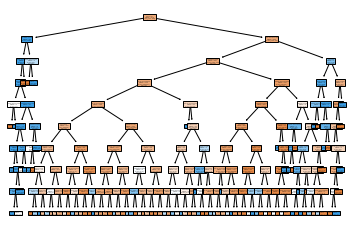

In [44]:
# implementing the decision tree model for the same dataset , where the criterion is 'gini',entropy criterion lets the values of probability to remain in (0,0.5)


dec_model_3= DecisionTreeClassifier(random_state=0, 
                                  criterion="gini", 
                                  max_depth=9)
dec_model_fit_3 = dec_model_3.fit(x_train, y_train) ## Train the model
##Predict Test Data
predicted_3 = dec_model_fit_3.predict(x_test)

##Performance of the model
print(classification_report(y_test, predicted_3))
print("Accuracy:",metrics.accuracy_score(y_test, predicted_3))

##Plot the tree
from sklearn import tree

tree.plot_tree(decision_tree = dec_model_fit_3, 
               feature_names = x_train.columns,
               class_names = (['yes', 'No']),
               filled = True,
               impurity = False
              )

In [45]:
roc_auc_score(y_test,dec_model_fit_3.predict_proba(x_test)[:,1])

0.5963898401327757

Text(0.5, 1.0, 'Receiver Operating Characteristic')

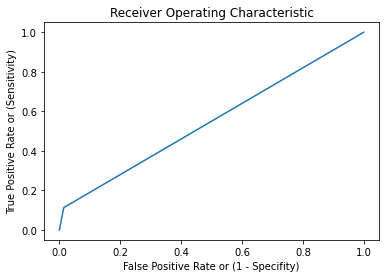

In [46]:
# Compute fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, predicted_3)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')

accuracy through decision tree algorithm with 'gini' criterion is 77 , which seems better than the decision tree algorithm with 'entropy' criterion

# building the random forest model

In [47]:
# implementing the random forest model for the same dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
begin_time = datetime.datetime.now()
rf_model=RandomForestClassifier(n_estimators=10,random_state=0)
rf_model_fit= rf_model.fit(x_train,y_train)
y_pred=rf_model_fit.predict(x_test)
print(datetime.datetime.now() - begin_time)

0:00:00.723244


In [48]:
rf_model_fit.score(x_test,y_test)

0.7430853424049697

In [49]:
#RandomForset with different estimators value
from sklearn.ensemble import RandomForestClassifier
begin_time = datetime.datetime.now()
rf_model2=RandomForestClassifier(n_estimators=10000,random_state=0)
rf_model_fit2= rf_model.fit(x_train,y_train)
y_pred2=rf_model_fit2.predict(x_test)
print(datetime.datetime.now() - begin_time)

0:00:00.716407


In [50]:
rf_model_fit2.score(x_test,y_test)

0.7430853424049697

even upon changing the estimator values,the random forest is giving the same accuracy

In [51]:
rf_model_fit2.n_features_in_

13

accuracy through random forest algorithm is 74.3 , which is not better than the decision tree algorithm

# building gradient boosting

In [52]:
# implementing the gradient boosting algorithm

from sklearn.ensemble import GradientBoostingClassifier
begin_time = datetime.datetime.now()
gb_model= GradientBoostingClassifier(n_estimators=10000,random_state=0)
gb_model.fit(x_train,y_train)
y_pred_gb=gb_model.predict(x_test)
print(datetime.datetime.now() - begin_time)

0:08:50.788093


gradient boosting algorithm is taking alot of processing time ,which in my case is about 9 minutes long,and is undesirable

In [53]:
gb_model.score(x_test,y_test)

0.7293299807720751

accuracy through gradient boosting algorithm is 72.9 , which is better than neither of the random forest algorithm nor the decision tree algorithm